In [21]:
"""A brief description of the code

Created by Camila Perez as part of the course Machine Learning - DAT-5303

The following code uses the data set birthweight after the low birth weight
has been removed form the dataframe. The quality of the data has been analysed
and improved and applied feature engineering when identified it was applicable.
Then three different models were applied for train and testing purposes.

Errors/Bugs identified as of November 24, 2021: None"""


# Importing libraries 
import pandas as pd                                  # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn as sns                                # enhanced data visualization
import statsmodels.formula.api as smf                # linear regression (statsmodels)
import sklearn.linear_model                          # linear models
import numpy as np                                   # mathematical functions
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression    # linear regression (scikit-learn)
from sklearn.neighbors import KNeighborsRegressor    # KNN for Regression
from sklearn.preprocessing import StandardScaler     # standard scaler


# Stating file name
file = './birthweight_low.xlsx'

# Reading file into python
bwlow = pd.read_excel(io        = file,
                     header     = 0,
                     sheet_name = 0)

# Creating a copy of the DataFrame
bwlow_colna = bwlow.copy()

# Dropping columns with no data in
bwlow_colna = bwlow_colna.dropna(axis = 1, how = 'all')


##########################################################################
# Imputing mising values
##########################################################################
# meduc
fill = 12 #mode
bwlow_colna['meduc'] = bwlow_colna['meduc'].fillna('fill')


# npvis
fill = 12 #mode
bwlow_colna['npvis'] = bwlow_colna['npvis'].fillna(fill)


# feduc
fill = 12 #mode
bwlow_colna['feduc'] = bwlow_colna['feduc'].fillna(fill)
##########################################################################


# log transforming bwght and saving it to the dataset
bwlow_colna['log_bwght'] = np.log(bwlow_colna['bwght'])


##########################################################################
#Log transformation interval and count data
##########################################################################

# log transforming meduc and saving it to the dataset
bwlow_colna['log_meduc'] = np.log(bwlow_colna['meduc'])

# log transforming monpre and saving it to the dataset
bwlow_colna['log_monpre'] = np.log(bwlow_colna['monpre'])

# log transforming mpvis and saving it to the dataset
bwlow_colna['log_npvis'] = np.log(bwlow_colna['npvis'])

# log transforming feduc and saving it to the dataset
bwlow_colna['log_feduc'] = np.log(bwlow_colna['feduc'])

# log transforming omaps and saving it to the dataset
bwlow_colna['log_omaps'] = np.log(bwlow_colna['omaps'])

# log transforming fmaps and saving it to the dataset
bwlow_colna['log_fmaps'] = np.log(bwlow_colna['fmaps'])


##########################################################################

#Creating mpoc feature and saving it to the dataset
bwlow_colna['mpoc'] = (bwlow_colna['mblck'] + bwlow_colna['moth'])

#Creating fpoc feature and saving it to the dataset
bwlow_colna['fpoc'] = (bwlow_colna['fblck'] + bwlow_colna['foth'])

# Dropping dummy column for ethnicity of mother
bwlow_colna = bwlow_colna.drop(labels = "moth", axis = 1)

# Dropping dummy column for ethnicity of mother
bwlow_colna = bwlow_colna.drop(labels = "foth", axis = 1)

##########################################################################
# Test and train splitting
##########################################################################

# Preparing explanatory variable data
bwght_data   = bwlow_colna.drop(["bwght",
                               "log_bwght"],
                               axis = 1)

# preparing response variables
bwght_target = bwlow_colna.loc[ : , "bwght"]
log_bwght_target = bwlow_colna.loc[ : , "log_bwght"]


# Preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            bwght_data, # x-variables
            bwght_target, # y-variable
            test_size = 0.25, # test size
            random_state = 219) # seed

##########################################################################

# declaring set of x-variables
x_variables = ['mage', 'fage', 'fmaps',
               'cigs', 'drink']

# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = bwlow_colna.loc[: , x_variables]


# preparing response variable
bwght_target = bwlow_colna.loc[ : , "bwght"]


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            bwght_data,     # x-variables
            bwght_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            bwght_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

##########################################################################
# Linear Regression
##########################################################################

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)

# Calculating the r-square of the train model
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)

# This will never know the true values of the Y
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# Saving test gap
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


##########################################################################
# Lasso Regression
##########################################################################

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude

# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)

# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square

# Saving gap score
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

##########################################################################
# Bayesian Automatic Relevance Determination (ARD) 
##########################################################################

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()

# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)

# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)

# Saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)

# Saving gap score
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

##########################################################################
# Bayesian Automatic Relevance Determination (ARD) 
##########################################################################

#Printing final model and comparison

print(f"""
Model      Train Score      Test Score      Gap Score
-----      -----------      ----------      ----------
OLS        {lr_train_score}           {lr_test_score}           {lr_test_gap}    Final Model
Lasso      {lasso_train_score}           {lasso_test_score}           {lasso_test_gap}
ARD        {ard_train_score}            {ard_test_score}           {ard_test_gap}
""")



Model      Train Score      Test Score      Gap Score
-----      -----------      ----------      ----------
OLS        0.7227           0.6514           0.0713    Final Model
Lasso      0.7443           0.6145           0.1298
ARD        0.735            0.6287           0.1063



<h1>Preparation of the data</h1> 

<h2>First exploration </h2>

During a first exploration of the data, it was noticed that some columns contained no data at all as it is shown in the outputs of Code 1.1.1 and Code 1.1.2 below. In this sense, columns 18 to 22 were dropped from the data set.

In [2]:
# Code 1.1.1
bwlow.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33'],
      dtype='object')

In [3]:
# Code 1.1.2
bwlow.iloc[ : , 18:34].describe()

,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Classification of the data </h2>

Before proceeding with any feature engineering, the data was the classified by type as follows:

<h3>Continuous</h3>

<br>bwght</br>
<br>mage</br>
<br>fage</br>

<h3>Interval/Count</h3>
<br>meduc</br>
<br>monpre</br>
<br>npvis</br>
<br>feduc</br>
<br>omaps</br>
<br>fmaps</br>
<br>cigs</br>
<br>drink</br>

<h3>Categorical/Other</h3>
<br>male</br>
<br>mwhte</br>
<br>mblck</br>
<br>moth</br>
<br>fwhte</br>
<br>fblck</br>
<br>foth</br>

<h2>Imputing missing values</h2>

Based on the result of the descriptive statistics and the mode of the features including missing values, it was decided to impute as following since the missing values represent less than 5% of the data.
<br></br>
<br></br>
For mother education, "meduc", it was decided to impute mode, 12 as a result of the analysis of the outputs from Code 1.3.1 and Code 1.3.2.

In [4]:
# Code 1.3.1
bwlow_colna['meduc'].describe().round(decimals = 2)

count    196.00
mean      13.88
std        2.05
min        8.00
25%       12.00
50%       14.00
75%       16.00
max       17.00
Name: meduc, dtype: float64

In [5]:
# Code 1.3.2
bwlow_colna['meduc'].mode()

0    12.0
dtype: float64

For number of prenatal visits, "npvis", it was decided to impute mode, 12 as a result of the analysis of the outputs from Code 1.3.3 and Code 1.3.4.

In [6]:
# Code 1.3.3
bwlow_colna['npvis'].describe().round(decimals = 2)

count    196.00
mean      11.61
std        4.23
min        2.00
25%       10.00
50%       12.00
75%       12.00
max       35.00
Name: npvis, dtype: float64

In [7]:
# Code 1.3.4
bwlow_colna['npvis'].mode()

0    12.0
dtype: float64

For father education, "feduc", it was decided to impute mode, 12 as a result of the analysis of the outputs from Code 1.3.5 and Code 1.3.6.

In [8]:
# Code 1.3.5
bwlow_colna['feduc'].describe().round(decimals = 2)

count    196.00
mean      13.78
std        2.61
min        1.00
25%       12.00
50%       14.00
75%       16.00
max       17.00
Name: feduc, dtype: float64

In [9]:
# Code 1.3.6
bwlow_colna['feduc'].mode()

0    12.0
dtype: float64

<h2>Continuous data</h2>

A visual exploratory data analysis was conducted for the continuous using Code 1.4.1 in order to develop trend features, however, after the analysis it is clear that there are no enough observations to flag engineering these features.

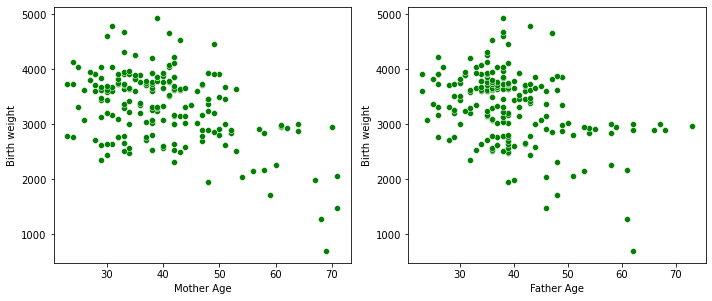

In [10]:
# Code 1.4.1

########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = bwlow_colna['mage'],
                y = bwlow_colna['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother Age')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = bwlow_colna['fage'],
                y = bwlow_colna['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father Age')
plt.ylabel(ylabel = 'Birth weight')


########################
plt.tight_layout()
plt.show()

<h2> Interval and Count Data</h2>

The interval and count data was transformed to a logarithmic form using Code 1.5.1 and then boxplots were used to check if the distribution of the data changed.

In [11]:
#Code 1.5.1

# log transforming Lot_Area and saving it to the dataset
bwlow_colna['log_meduc'] = np.log(bwlow_colna['meduc'])


bwlow_colna['log_monpre'] = np.log(bwlow_colna['monpre'])

# log transforming Lot_Area and saving it to the dataset
bwlow_colna['log_npvis'] = np.log(bwlow_colna['npvis'])

# log transforming Lot_Area and saving it to the dataset
bwlow_colna['log_feduc'] = np.log(bwlow_colna['feduc'])

# log transforming Lot_Area and saving it to the dataset
bwlow_colna['log_omaps'] = np.log(bwlow_colna['omaps'])

# log transforming Lot_Area and saving it to the dataset
bwlow_colna['log_fmaps'] = np.log(bwlow_colna['fmaps'])


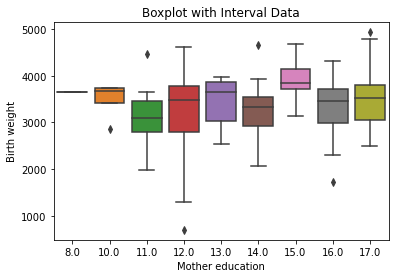

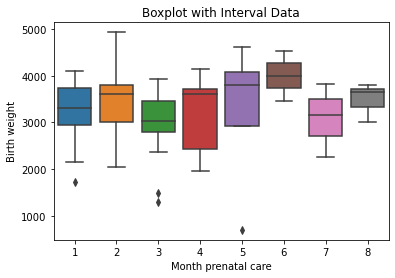

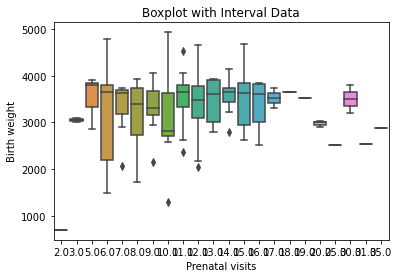

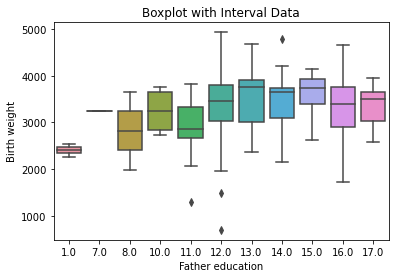

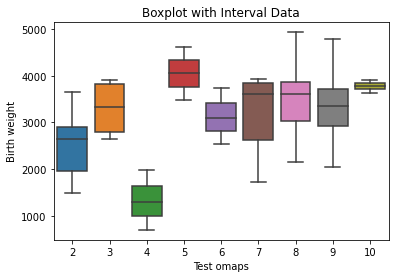

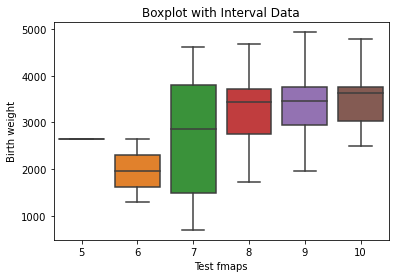

In [12]:
#Code 1.5.2

########################################################
# developing a boxplot
sns.boxplot(x    = 'meduc',
            y    = 'bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Mother education')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'monpre',
            y    = 'bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Month prenatal care')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'npvis',
            y    = 'bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Prenatal visits')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'feduc',
            y    = 'bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Father education')
plt.ylabel(ylabel = 'Birth weight')


# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'omaps',
            y    = 'bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Test omaps')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'fmaps',
            y    = 'bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Test fmaps')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()


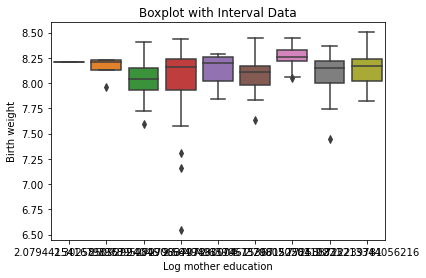

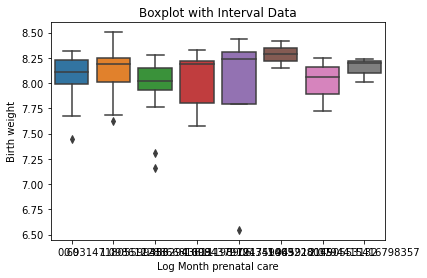

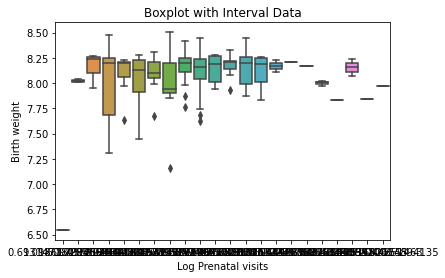

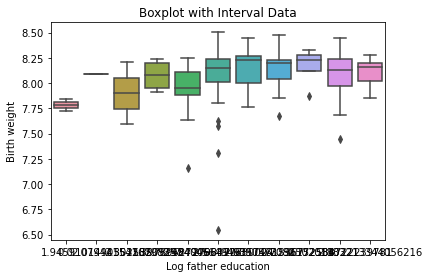

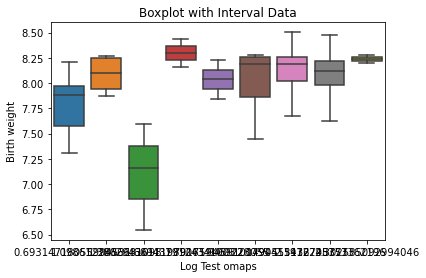

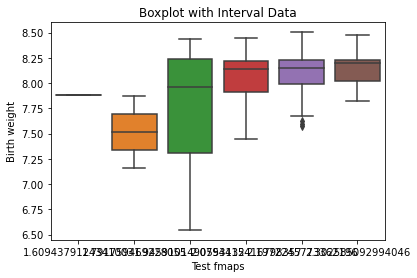

In [13]:
#Code 1.5.3

########################################################
# developing a boxplot
sns.boxplot(x    = 'log_meduc',
            y    = 'log_bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Log mother education')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'log_monpre',
            y    = 'log_bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Log Month prenatal care')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'log_npvis',
            y    = 'log_bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Log Prenatal visits')
plt.ylabel(ylabel = 'Birth weight')


# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'log_feduc',
            y    = 'log_bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Log father education')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'log_omaps',
            y    = 'log_bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Log Test omaps')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()

########################################################

# developing a boxplot
sns.boxplot(x    = 'log_fmaps',
            y    = 'log_bwght',
            data = bwlow_colna)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Test fmaps')
plt.ylabel(ylabel = 'Birth weight')

# displaying the plot
plt.show()


<h2> Categorical Data</h2>


The ethnicity of mother and father is already presented in a dummy format, therefore if will be necessary to drop one column in each feature. For the ethnicity was created another feature for mother/father is people of color.